In [81]:
%matplotlib notebook

import matplotlib as mpl
import DataSetQuery
import datetime
import pandas as pd
import MalardHelpers
import geopandas as gp
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import Polygon, Point
from osgeo import gdal
import os
import numpy as np
from scipy.interpolate import griddata
import pandas as  pd
import geopandas as gp
from osgeo import gdal
import os
import json
import math
from pandas.io.json import json_normalize
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display

In [3]:
#dfStats = gp.read_file("regression_results/ols_run_tdx2.gpkg")
dfStats = gp.read_file("regression_results/alaska.gpkg")
#rivers = gp.read_file("/data/puma1/scratch/mtngla/background-shapefiles/rivers_reprojected.shp")
#countries = gp.read_file("/data/puma1/scratch/mtngla/background-shapefiles/countries.shp")
coastline = gp.read_file('/data/puma1/scratch/mtngla/background-shapefiles/alaska/coastline.shp')


In [82]:
minCount=50
pd.options.display.max_columns = None
display(dfStats)


,gridCell.minX,gridCell.minY,gridCell.size,statistics.ADwithTDX_filtered,statistics.DebrisMaskArea,statistics.GlacierMaskArea,statistics.afterGlacierMask,statistics.meanElevationDifference,statistics.pointsOnDataSetValue0,statistics.pointsOnDataSetValue0Ratio,statistics.pointsOnDataSetValue1,statistics.pointsOnDataSetValue1Ratio,statistics.pointsOnDataSetValue2,statistics.pointsOnDataSetValue2Ratio,statistics.pointsWithinDebrisMask,statistics.result_avgX,statistics.result_avgY,statistics.result_count_2010,statistics.result_count_2011,statistics.result_count_2012,statistics.result_count_2013,statistics.result_count_2014,statistics.result_count_2015,statistics.result_count_2016,statistics.result_count_2017,statistics.result_count_2018,statistics.result_count_2019,statistics.result_offsetX,statistics.result_offsetY,statistics.result_refDifference_2010,statistics.result_refDifference_2011,statistics.result_refDifference_2012,statistics.result_refDifference_2013,statistics.result_refDifference_2014,statistics.result_refDifference_2015,statistics.result_refDifference_2016,statistics.result_refDifference_2017,statistics.result_refDifference_2018,statistics.result_refDifference_2019,statistics.result_total,regression.rsquared,regression.c,regression.c.se,regression.c.year,regression.c.se.year,regression.const,regression.const.se,regression.count,regression.robust.c,regression.robust.c.se,regression.robust.c.year,regression.robust.c.se.year,regression.robust.const,regression.robust.const.se,regression.robust.count,geometry,statistics.GlacierMaskArea.pointsize,regression.c.difference
0,-3900000,-600000,100000,525156,0.953197,25.316884,102,-18.988451,6.000000,5.882353,nan,nan,96.000000,94.117647,30,"-3,825,121.434475","-506,545.681617",0,0,0,7,14,17,26,26,12,0,"24,878.565525","3,343,454.318383",0.000000,0.000000,0.000000,-12.575046,-14.751292,-19.575431,-6.194887,-50.917235,14.618241,0.000000,102,0.003222,-0.000000,0.000000,-1.212990,2.133621,37.162431,98.818700,102.000000,0.000000,0.000000,0.058231,1.091764,-16.946199,50.565080,102.000000,POINT (-3850000 -550000),20.000000,1.154759
1,-3900000,-500000,100000,224707,2.100895,56.170261,991,-9.611851,117.000000,11.806256,nan,nan,874.000000,88.193744,57,"-3,862,236.529735","-441,147.911222",20,0,242,61,172,145,57,279,15,0,"-12,236.529735","3,408,852.088778",1.118099,0.000000,5.901971,6.731138,-7.883426,-16.557266,-6.622780,-24.566163,-26.558144,0.000000,991,0.242151,-0.000000,0.000000,-5.941834,0.334249,257.061452,15.016882,991.000000,-0.000000,0.000000,-4.627774,0.260119,199.643914,11.686424,991.000000,POINT (-3850000 -450000),20.000000,1.314059
2,-3900000,-400000,100000,144253,22.287031,387.630297,53816,9.268683,"13,818.000000",25.676379,"6,435.000000",11.957410,"33,563.000000",62.366211,927,"-3,833,986.729340","-359,786.214085",2530,7016,8196,6110,6303,6061,7215,4962,3907,1516,"16,013.270660","3,490,213.785915",47.449785,12.294879,14.018322,13.848151,9.897168,5.529291,3.311230,-1.713777,-3.133748,-3.990651,53816,0.021752,-0.000000,0.000000,-3.430704,0.099178,162.301446,4.430414,"53,816.000000",-0.000000,0.000000,-1.477125,0.020751,66.085128,0.926973,"53,816.000000",POINT (-3850000 -350000),50.000000,1.953579
3,-3900000,-300000,100000,76477,0.270185,3.638529,114,811.795793,nan,nan,114.000000,100.000000,nan,nan,46,"-3,802,537.607375","-287,414.453730",0,0,76,0,0,12,0,26,0,0,"47,462.392625","3,562,585.546270",0.000000,0.000000,939.610806,0.000000,0.000000,930.006936,0.000000,383.623692,0.000000,0.000000,114,0.806587,-0.000003,0.000000,-108.164606,5.004884,"5,575.562520",220.638738,114.000000,-0.000004,0.000000,-120.126271,1.575984,"6,072.221159",69.476759,114.000000,POINT (-3850000 -250000),5.000000,-11.961666
4,-3800000,-700000,100000,152818,0.169881,1.309048,33,-85.540245,5.000000,15.151515,nan,nan,28.000000,84.848485,0,"-3,731,767.355738","-607,639.567029",0,7,2,0,0,0,0,17,0,7,"18,232.644262","3,142,360.432971",0.000000,-49.947315,-72.508575,0.000000,0.000000,0.000000,0.000000,-111.617702

In [5]:
dfStats.columns

Index(['gridCell.minX', 'gridCell.minY', 'gridCell.size',
       'statistics.ADwithTDX_filtered', 'statistics.DebrisMaskArea',
       'statistics.GlacierMaskArea', 'statistics.afterGlacierMask',
       'statistics.meanElevationDifference',
       'statistics.pointsOnDataSetValue0',
       'statistics.pointsOnDataSetValue0Ratio',
       'statistics.pointsOnDataSetValue1',
       'statistics.pointsOnDataSetValue1Ratio',
       'statistics.pointsOnDataSetValue2',
       'statistics.pointsOnDataSetValue2Ratio',
       'statistics.pointsWithinDebrisMask', 'statistics.result_avgX',
       'statistics.result_avgY', 'statistics.result_count_2010',
       'statistics.result_count_2011', 'statistics.result_count_2012',
       'statistics.result_count_2013', 'statistics.result_count_2014',
       'statistics.result_count_2015', 'statistics.result_count_2016',
       'statistics.result_count_2017', 'statistics.result_count_2018',
       'statistics.result_count_2019', 'statistics.result_offsetX',


In [22]:
dfStats.shape[0]

104

In [23]:
pd.options.display.float_format = '{:20,.6f}'.format
dfStats.mean()

gridCell.minX                              -3,328,846.153846
gridCell.minY                                 194,230.769231
gridCell.size                                 100,000.000000
statistics.ADwithTDX_filtered                 856,868.461538
statistics.DebrisMaskArea                          88.509704
statistics.GlacierMaskArea                        900.918885
statistics.afterGlacierMask                   203,702.250000
statistics.meanElevationDifference                  3.413001
statistics.pointsOnDataSetValue0                6,727.223684
statistics.pointsOnDataSetValue0Ratio               6.809805
statistics.pointsOnDataSetValue1               30,347.708861
statistics.pointsOnDataSetValue1Ratio              26.405890
statistics.pointsOnDataSetValue2              177,452.553398
statistics.pointsOnDataSetValue2Ratio              75.693103
statistics.pointsWithinDebrisMask               8,545.230769
statistics.result_avgX                     -3,278,112.418833
statistics.result_avgY  

In [10]:

dfStats.loc[(dfStats['statistics.GlacierMaskArea']<10.0), 'statistics.GlacierMaskArea.pointsize'] = 5
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>=10.0) & (dfStats['statistics.GlacierMaskArea']<100.0), 'statistics.GlacierMaskArea.pointsize'] = 20
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>=100.0) & (dfStats['statistics.GlacierMaskArea']<500.0), 'statistics.GlacierMaskArea.pointsize'] = 50
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>=500.0) & (dfStats['statistics.GlacierMaskArea']<1000.0), 'statistics.GlacierMaskArea.pointsize'] = 80
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>=1000.0) & (dfStats['statistics.GlacierMaskArea']<2000.0), 'statistics.GlacierMaskArea.pointsize'] = 125
dfStats.loc[(dfStats['statistics.GlacierMaskArea']>2000.0), 'statistics.GlacierMaskArea.pointsize'] = 170

<IPython.core.display.Javascript object>


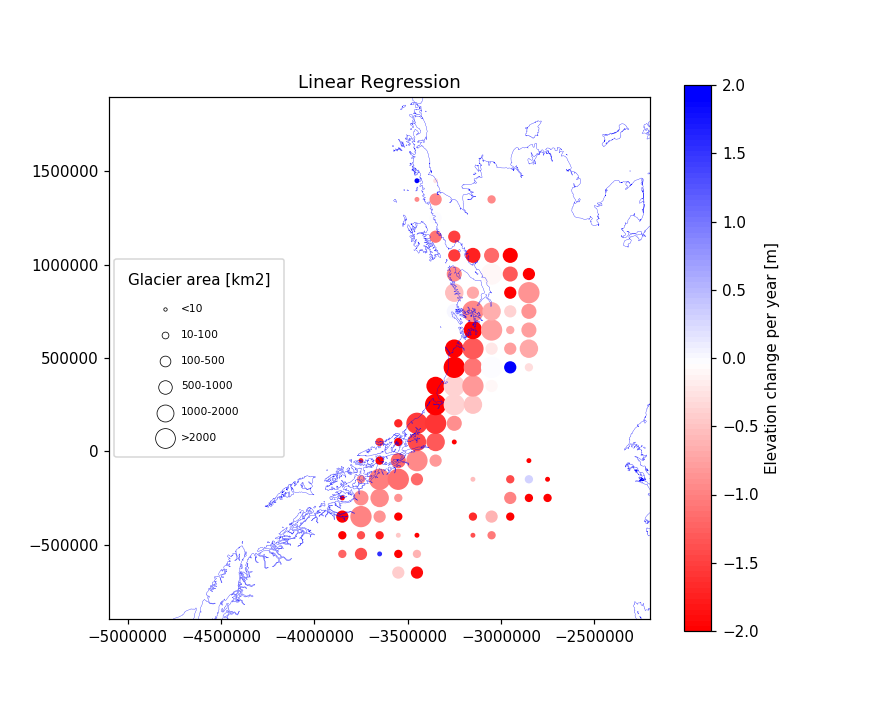

Text(0.5, 1.0, 'Linear Regression')

In [33]:
%matplotlib notebook


colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
n_bin = 98  # Discretizes the interpolation into bins
# Create the colormap
cm_ = LinearSegmentedColormap.from_list('my_list', colors, N=n_bin)
cm = LinearSegmentedColormap.from_list('extremes',list(map(cm_,range(100))), N=100)

#dfStatsfiltered = dfStats[(dfStats['regression.c.se.year'] <= 0.20)]
dfStatsfiltered = dfStats[(dfStats['regression.count'] > minCount)]
vmin=-2
vmax=2
fig, ax = plt.subplots(figsize=(8,6.5))

# plot rivers and country boundaries
#countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)
#rivers.plot(ax=ax, edgecolor='blue', linewidth=0.2)
coastline.plot(ax=ax, color='blue', edgecolor=None, linewidth=0.2)

#markersize = dfStats['regression.count']/100
#msf = 170
#markersize = (dfStatsfiltered['statistics.GlacierMaskArea'])*msf
markersize = dfStatsfiltered['statistics.GlacierMaskArea.pointsize']
dfStatsfiltered.plot(ax=ax, column='regression.c.year', markersize=markersize, vmin=vmin, \
                     vmax=vmax, cmap=cm)

#labels = ["0.05", "0.10", "0.20", "0.30"]
#sizes = [(1-0.05)*msf, (1-0.10)*msf, (1-0.20)*msf, (1-0.30)*msf]
#print(sizes)
labels = ["<10", "10-100", "100-500", "500-1000", "1000-2000", ">2000"]
sizes = [5, 20, 50, 80, 125, 170]
markers=[]
for size in sizes:
    markers.append(plt.scatter([],[], s=size, label=size, color='white', edgecolor='black', linewidth=0.5))

bar=fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cm))
bar.set_label('Elevation change per year [m]')
    
plt.legend(handles=markers)
leg = plt.legend(markers, labels, ncol=1, frameon=True, fontsize=7,handlelength=1, loc = 6, borderpad = 1.3,\
handletextpad=1, title='Glacier area [km2]', scatterpoints = 1, labelspacing=1.5)

plt.xlim(-5100000, -2200000)
plt.ylim(-900000, 1900000)
plt.title('Linear Regression')

#for i, txt in enumerate(dfStatsfiltered['regression.count']):
    #print(dfStatsfiltered.loc[dfStatsfiltered.index[i], 'statistics.afterGlacierMask'])
    #if dfStatsfiltered.loc[dfStatsfiltered.index[i], 'statistics.afterGlacierMask'] > 50:
    #    ax.annotate(int(txt), (dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minX']+ \
    #                           (size/2)+10000, dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minY']+\
    #                           (size/2)+10000), fontsize=5)
#for i, txt in enumerate(dfStatsfiltered['regression.c.year']):
#    print(dfStatsfiltered.loc[dfStatsfiltered.index[i], 'statistics.afterGlacierMask'])
#    if dfStatsfiltered.loc[dfStatsfiltered.index[i], 'statistics.afterGlacierMask'] > 50:
#        ax.annotate('{0:.2g}'.format(txt), (dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minX']+ \
#                               (size/2)+10000, dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minY']+\
#                               (size/2)+10000), fontsize=5)

In [26]:
dfStatsfiltered.shape[0]

97

<IPython.core.display.Javascript object>


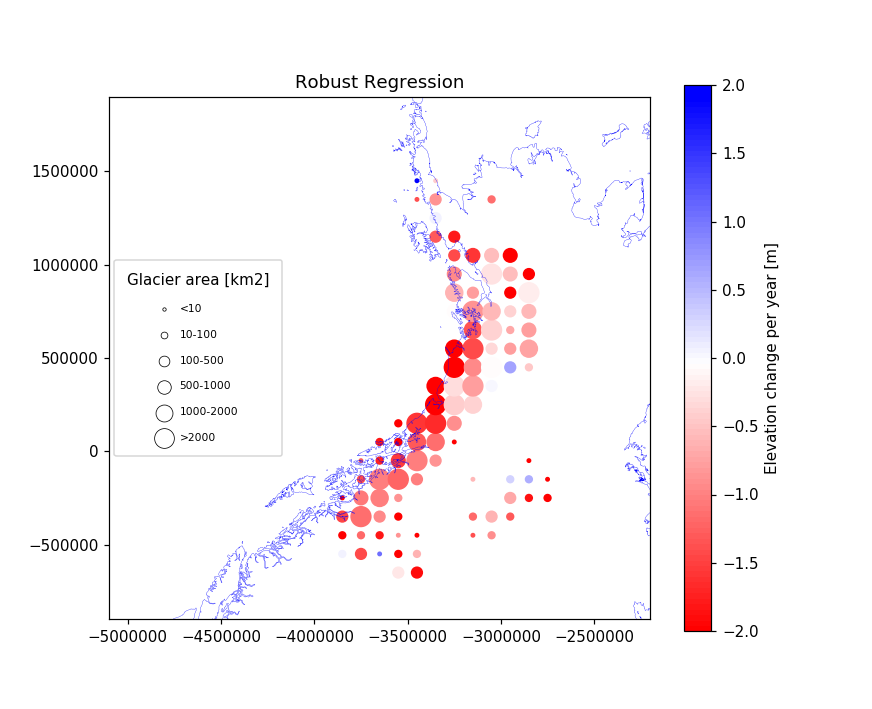

Text(0.5, 1.0, 'Robust Regression')

In [40]:
#ROBUST
%matplotlib notebook


colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
n_bin = 98  # Discretizes the interpolation into bins
# Create the colormap
cm_ = LinearSegmentedColormap.from_list('my_list', colors, N=n_bin)
cm = LinearSegmentedColormap.from_list('extremes',list(map(cm_,range(100))), N=100)

#dfStatsfiltered = dfStats[(dfStats['regression.c.se.year'] <= 0.20)]
dfStatsfiltered = dfStats[(dfStats['regression.robust.count'] > 50)]
vmin=-2
vmax=2
fig, ax = plt.subplots(figsize=(8,6.5))

# plot rivers and country boundaries
#countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)
#rivers.plot(ax=ax, edgecolor='blue', linewidth=0.2)
coastline.plot(ax=ax, color='blue', edgecolor=None, linewidth=0.2)


markersize = dfStatsfiltered['statistics.GlacierMaskArea.pointsize']
dfStatsfiltered.plot(ax=ax, column='regression.robust.c.year', markersize=markersize, vmin=vmin, \
                     vmax=vmax, cmap=cm)

bar=fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cm))
bar.set_label('Elevation change per year [m]')

labels = ["<10", "10-100", "100-500", "500-1000", "1000-2000", ">2000"]
sizes = [5, 20, 50, 80, 125, 170]
markers=[]
for size in sizes:
    markers.append(plt.scatter([],[], s=size, label=size, color='white', edgecolor='black', linewidth=0.5))

plt.legend(handles=markers)
leg = plt.legend(markers, labels, ncol=1, frameon=True, fontsize=7,handlelength=1, loc = 6, borderpad = 1.2,\
handletextpad=1, title='Glacier area [km2]', scatterpoints = 1, labelspacing=1.5)

plt.xlim(-5100000, -2200000)
plt.ylim(-900000, 1900000)
plt.title('Robust Regression')

<IPython.core.display.Javascript object>


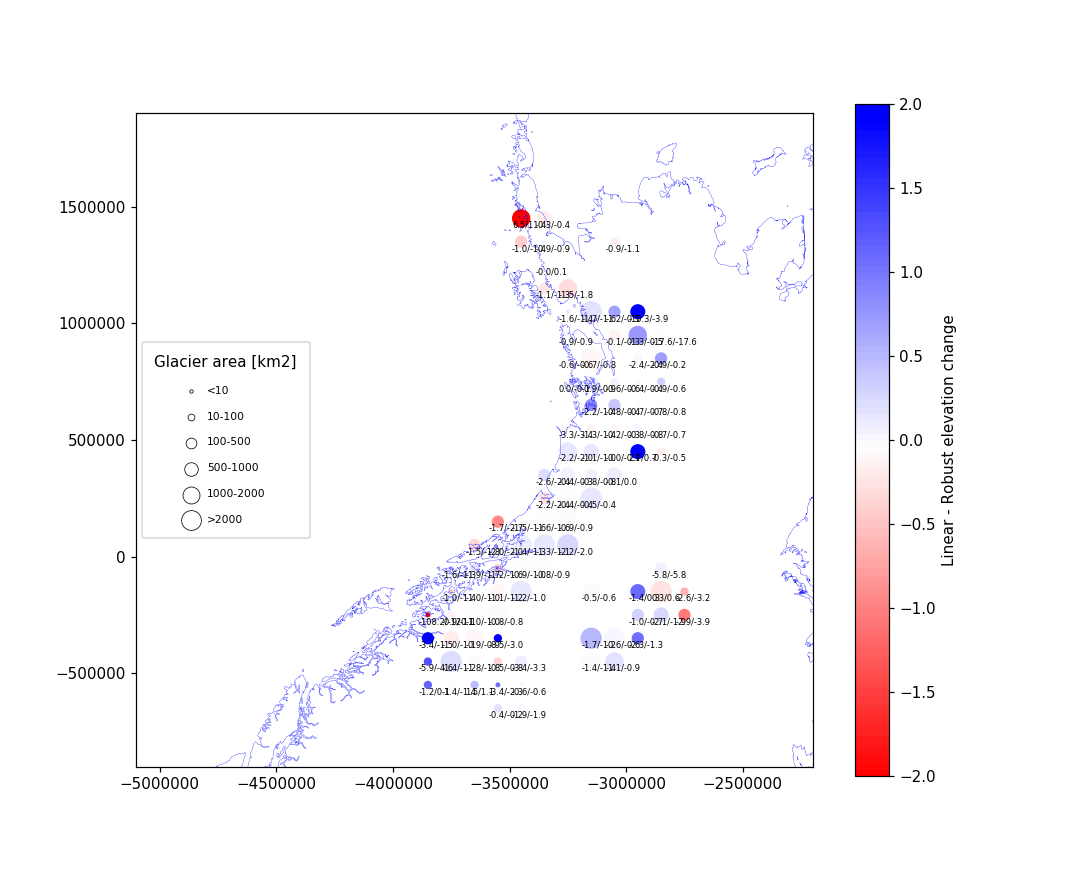

(-900000, 1900000)

In [57]:
%matplotlib notebook
# DIFFERENCE between linear and robust

dfStats['regression.c.difference'] = abs(dfStats['regression.c.year'])-abs(dfStats['regression.robust.c.year'])
fig, ax = plt.subplots(figsize=(10,8))

# plot rivers and country boundaries
#countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)
#rivers.plot(ax=ax, edgecolor='blue', linewidth=0.2)
coastline.plot(ax=ax, color='blue', edgecolor=None, linewidth=0.2)

vmin=-2
vmax=2

markersize = dfStatsfiltered['statistics.GlacierMaskArea.pointsize']
dfStats.plot(ax=ax, column='regression.c.difference', markersize=markersize, vmin=vmin, \
                     vmax=vmax, cmap=cm)

bar=fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cm))
bar.set_label('Linear - Robust elevation change')

labels = ["<10", "10-100", "100-500", "500-1000", "1000-2000", ">2000"]
sizes = [5, 20, 50, 80, 125, 170]
markers=[]
for size in sizes:
    markers.append(plt.scatter([],[], s=size, label=size, color='white', edgecolor='black', linewidth=0.5))

plt.legend(handles=markers)
leg = plt.legend(markers, labels, ncol=1, frameon=True, fontsize=7,handlelength=1, loc = 6, borderpad = 1.2,\
handletextpad=1, title='Glacier area [km2]', scatterpoints = 1, labelspacing=1.5)

plt.xlim(-5100000, -2200000)
plt.ylim(-900000, 1900000)

for i, txt in enumerate(dfStatsfiltered['regression.c.year']):
    en = "%.1f/%.1f" %(dfStatsfiltered.loc[dfStatsfiltered.index[i], 'regression.c.year'], dfStatsfiltered.loc[dfStatsfiltered.index[i], 'regression.robust.c.year'])
    ax.annotate(en, (dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minX']+ \
                               (size/2)+10000, dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minY']+\
                               (size/2)+10000), fontsize=5.5)

<IPython.core.display.Javascript object>


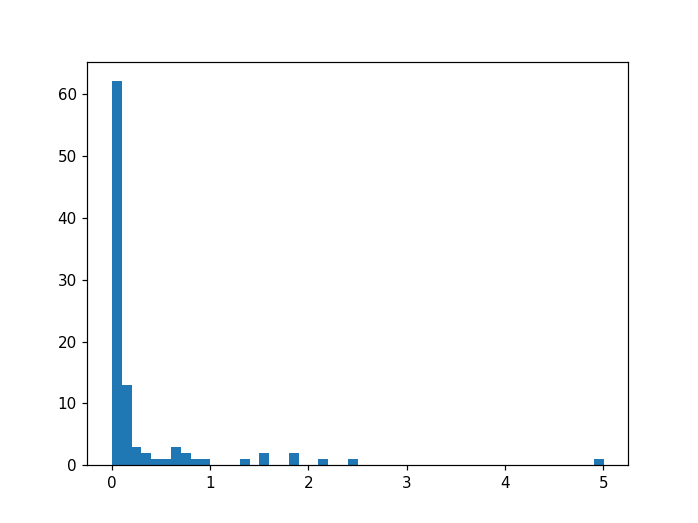

(array([62., 13.,  3.,  2.,  1.,  1.,  3.,  2.,  1.,  1.,  0.,  0.,  0.,
         1.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.91564923e-03, 1.02955017e-01, 2.02994384e-01, 3.03033752e-01,
        4.03073119e-01, 5.03112487e-01, 6.03151854e-01, 7.03191221e-01,
        8.03230589e-01, 9.03269956e-01, 1.00330932e+00, 1.10334869e+00,
        1.20338806e+00, 1.30342743e+00, 1.40346679e+00, 1.50350616e+00,
        1.60354553e+00, 1.70358490e+00, 1.80362426e+00, 1.90366363e+00,
        2.00370300e+00, 2.10374237e+00, 2.20378173e+00, 2.30382110e+00,
        2.40386047e+00, 2.50389984e+00, 2.60393920e+00, 2.70397857e+00,
        2.80401794e+00, 2.90405731e+00, 3.00409667e+00, 3.10413604e+00,
        3.20417541e+00, 3.30421478e+00, 3.40425414e+00, 3.50429351e+00,
        3.60433288e+00, 3.70437225e+00, 3.80441161e+00, 3.90445098e+

In [68]:
%matplotlib notebook
plt.hist(dfStats['regression.c.se.year'], bins=50)

<IPython.core.display.Javascript object>


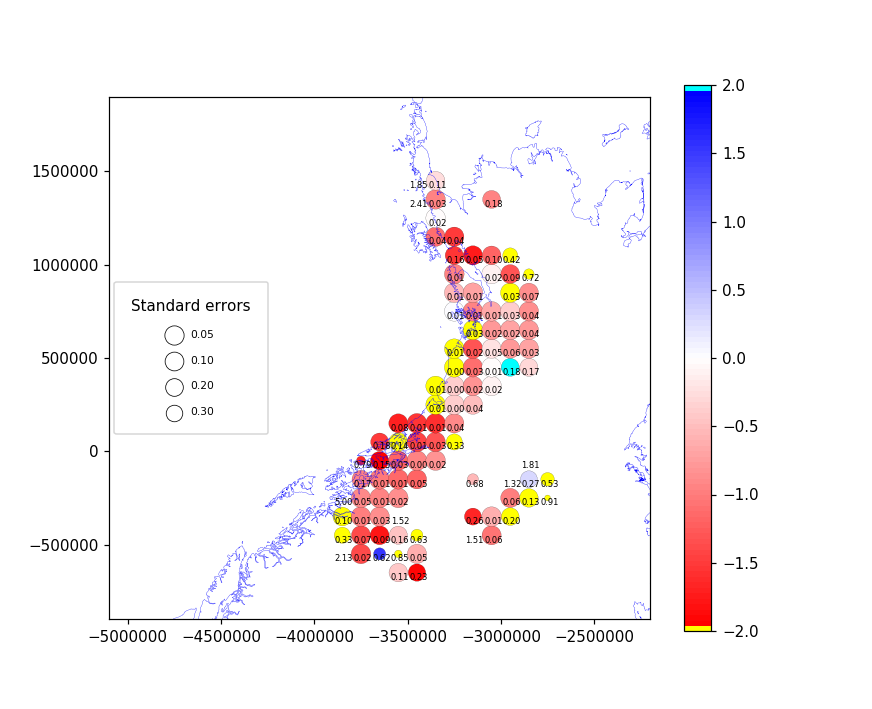

In [80]:
%matplotlib notebook


colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
n_bin = 98  # Discretizes the interpolation into bins
# Create the colormap
cm_ = LinearSegmentedColormap.from_list('my_list', colors, N=n_bin)
cm = LinearSegmentedColormap.from_list('extremes',[(1, 1, 0)]+list(map(cm_,range(98)))+[(0, 1, 1)], N=100)

#dfStatsfiltered = dfStats[(dfStats['regression.c.se.year'] <= 0.20)]
dfStatsfiltered = dfStats[(dfStats['regression.count'] > 50)]
vmin=-2
vmax=2
fig, ax = plt.subplots(figsize=(8,6.5))

# plot rivers and country boundaries
#countries.plot(ax=ax, edgecolor='grey', color='gainsboro', linewidth=0.5)
#rivers.plot(ax=ax, edgecolor='blue', linewidth=0.2)
coastline.plot(ax=ax, color='blue', edgecolor=None, linewidth=0.2)

#markersize = dfStats['regression.count']/100
msf = 170
markersize = (1-dfStatsfiltered['regression.c.se.year'])*msf
dfStatsfiltered.plot(ax=ax, column='regression.c.year', markersize=markersize, legend=True, vmin=vmin, \
                     vmax=vmax, cmap=cm, edgecolor='black', linewidth=0.1)

labels = ["0.05", "0.10", "0.20", "0.30"]
sizes = [(1-0.05)*msf, (1-0.10)*msf, (1-0.20)*msf, (1-0.30)*msf]
markers=[]
for size in sizes:
    markers.append(plt.scatter([],[], s=size, label=size, color='white', edgecolor='black', linewidth=0.5))

plt.legend(handles=markers)
leg = plt.legend(markers, labels, ncol=1, frameon=True, fontsize=7,handlelength=1, loc = 6, borderpad = 1.6,\
handletextpad=1, title='Standard errors', scatterpoints = 1, labelspacing=1.5)

plt.xlim(-5100000, -2200000)
plt.ylim(-900000, 1900000)

for i, txt in enumerate(dfStatsfiltered['regression.c.se.year']):
    en = "%.2f" %(dfStatsfiltered.loc[dfStatsfiltered.index[i], 'regression.c.se.year'])
    ax.annotate(en, (dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minX']+ \
                               (size/2)+10000, dfStatsfiltered.loc[dfStatsfiltered.index[i], 'gridCell.minY']+\
                               (size/2)+10000), fontsize=5.5)

<IPython.core.display.Javascript object>


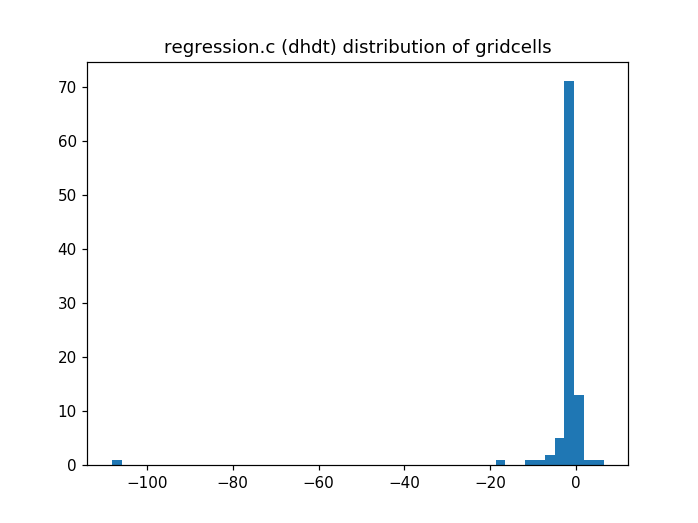

In [72]:
%matplotlib notebook
plt.hist(dfStatsfiltered['regression.c.year'], bins=50)
plt.title('regression.c (dhdt) distribution of gridcells')
plt.show()

<IPython.core.display.Javascript object>


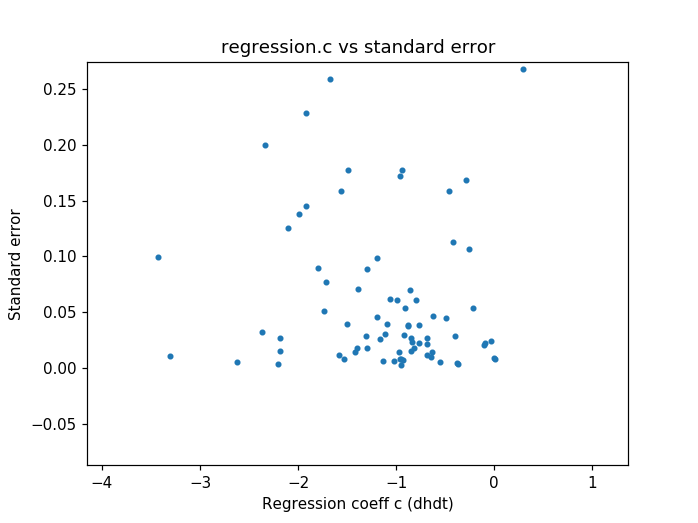

In [73]:
%matplotlib notebook
plt.scatter(dfStatsfiltered['regression.c.year'],dfStatsfiltered['regression.c.se.year'], marker='.')
plt.title('regression.c vs standard error')
plt.xlabel('Regression coeff c (dhdt)')
plt.ylabel('Standard error')
plt.show()

<IPython.core.display.Javascript object>


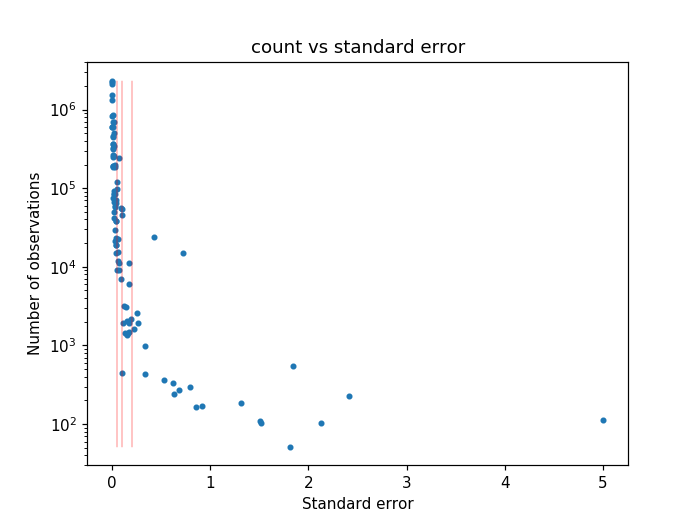

In [74]:
%matplotlib notebook
fig, ax = plt.subplots()
plt.scatter(dfStatsfiltered['regression.c.se.year'],dfStatsfiltered['regression.count'], marker='.')
ymax=dfStatsfiltered['regression.count'].max()
ymin=dfStatsfiltered['regression.count'].min()
plt.plot([0.05,0.05],[ymin,ymax], '-r', linewidth=0.3)
plt.plot([0.1,0.1],[ymin,ymax], '-r', linewidth=0.3)
plt.plot([0.2,0.2],[ymin,ymax], '-r', linewidth=0.3)
plt.title('count vs standard error')
plt.ylabel('Number of observations')
plt.xlabel('Standard error')
ax.set_yscale('log')
plt.show()

<IPython.core.display.Javascript object>


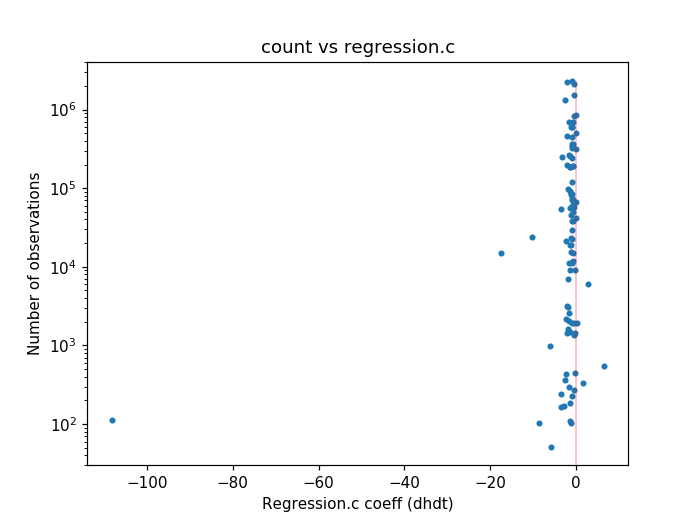

In [75]:
%matplotlib notebook
fig, ax = plt.subplots()
plt.scatter(dfStatsfiltered['regression.c.year'],dfStatsfiltered['regression.count'], marker='.')
ymax=dfStatsfiltered['regression.count'].max()
plt.plot([0,0],[0,ymax], '-r', linewidth=0.3)
plt.title('count vs regression.c')
plt.ylabel('Number of observations')
plt.xlabel('Regression.c coeff (dhdt)')
ax.set_yscale('log')
plt.show()